<a href="https://colab.research.google.com/github/iqraceme/inital-data-analysis/blob/master/initial_data_analysis(NER%20version).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import nltk
import string
import re
from collections import Counter
from nltk.corpus import stopwords



In [3]:
!pip install -U spacy
!pip install scispacy


     |████████████████████████████████| 10.3MB 5.0MB/s 
     |████████████████████████████████| 3.7MB 28.8MB/s 
     |████████████████████████████████| 122kB 48.5MB/s 
     |████████████████████████████████| 2.2MB 32.6MB/s 
  Found existing installation: blis 0.2.4
    Uninstalling blis-0.2.4:
      Successfully uninstalled blis-0.2.4
  Found existing installation: preshed 2.0.1
    Uninstalling preshed-2.0.1:
      Successfully uninstalled preshed-2.0.1
  Found existing installation: thinc 7.0.8
    Uninstalling thinc-7.0.8:
      Successfully uninstalled thinc-7.0.8
  Found existing installation: spacy 2.1.9
    Uninstalling spacy-2.1.9:
      Successfully uninstalled spacy-2.1.9
     |████████████████████████████████| 2.5MB 13.4MB/s 
     |████████████████████████████████| 13.0MB 22.0MB/s 
     |████████████████████████████████| 5.4MB 32.3MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 153kB 52.2MB/s 
  Created wheel for scispacy: 

In [0]:
filename = 'testing-data.csv'

In [0]:
import scispacy
import spacy


In [0]:
data_frame = pd.read_csv(filename , encoding='latin1',engine='c') 


In [5]:
data_frame.head(100)

,Author name,Article name,Type of article,abstract,Year,number of pages,column,page_range
0,NaN,Beta blocker heart attack trial: Design features,Controlled Clinical Trials,The Beta Blocker Heart Attack Trial (BHAT) is ...,1981,2,4,275-285
1,NaN,A randomized clinical study of cardiopulmonary...,American Journal of Emergency Medicine,The Brain Resuscitation Clinical Trial (BRCT) ...,1986,4,1,72-86
2,NaN,Implementation of a multicomponent process to ...,Controlled Clinical Trials,The Diabetes Control and Complications Trial (...,1989,10,1,83-96
3,NaN,Appraisal of the radiography of the knee as a ...,Revue du Rhumatisme et des Maladies Osteo-Arti...,Within the context of the initiation of practi...,1990,57,6,451-457
4,NaN,How good are volunteers at searching for publi...,Electronic Article,The Ottawa Stroke Trials Registry (OSTR) colle...,1995,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
95,"Abbott, J. H.:Robertson, M. C.:McKenzie, J. E....","Exercise therapy, manual therapy, or both, for...",Trials [Electronic Resource],"BACKGROUND: Non-pharmacological, non-surgical ...",2009,10,NaN,11
96,"Abbott, J. H.:Robertson, M. C.:Chapple, C.:Pin...","Manual therapy, exercise therapy, or both, in ...",Osteoarthritis & Cartilage,OBJECTIVE: To evaluate the clinical effectiven...,2013,21,4,525-34
97,"Abbott, M. D.:Arthur, A. J.:Walker, L.:Doody, G.",The challenge of recruiting people with schizo...,British Journal of General Practice,People with schizophrenia have an increased ri...,2005,55,517,634-636
98,"Abboud, M. R.:Cure, J.:Granger, S.:Gallagher, ...",Magnetic resonance angiography in children wit...,Blood,The stroke prevention study in sickle cell dis...,2004,103,7,2822-2826


In [0]:
sample_text = data_frame['abstract'][0]

In [7]:
sample_text

'The Beta Blocker Heart Attack Trial (BHAT) is a multicenter, randomized, double-blind, placebo control clinical trial sponsored by the National Heart, Lung, and Blood Institute designed to test the effectiveness of regular propranolol administration in reducing total mortality in patients who have survived a recent acute myocardial infarction. A number of other fatal and nonfatal response variables are also being monitored. Three thousand eight hundred thirty-seven patients, ages 30-69, are being followed at 31 clinical centers for a minimum of about 2 and a maximum of 4 years after the infarction. A number of design features of BHAT are discussed. These include maintenance of patient logs, guidelines for obtaining informed consent of patients, assessment of patient knowledge about BHAT, adjustment of study drug dose based on serum levels, and comparison of 1-hr and 24-hr ambulatory electrocardiogram readings. Â© 1981.'

In [10]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_sm-0.2.4.tar.gz

     |████████████████████████████████| 17.0MB 3.9MB/s 
  Created wheel for en-core-sci-sm: filename=en_core_sci_sm-0.2.4-cp36-none-any.whl size=17161110 sha256=b44ae02e6736993f14258500ede8a88a2e5c475a40a8c82fdfd3a72c5c7d9c03
  Stored in directory: /root/.cache/pip/wheels/34/60/b9/fabd9c3eeba17ed66df745479f2fc502a6702755cb4a9632f2
Successfully built en-core-sci-sm


In [0]:
len(data_frame)

55633

In [0]:
import scispacy
import spacy
import en_core_sci_sm   #The model we are going to use
from spacy import displacy
from scispacy.abbreviation import AbbreviationDetector
from scispacy.umls_linking import UmlsEntityLinker

In [14]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 47.5MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.0-cp36-none-any.whl size=829187831 sha256=fc0e199b6daf2b0b55a073ec6515d37dcab54ac80b52733d25b0bbf0cc6a4e38
  Stored in directory: /tmp/pip-ephem-wheel-cache-570t28z3/wheels/9f/3c/d6/3ade7ed8195030f4d7f299cf73d856a84d7b3effd5890133fb
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [0]:
doc = nlp(sample_text)

In [12]:
print(list(doc.sents))

[The Beta Blocker Heart Attack Trial (BHAT) is a multicenter, randomized, double-blind, placebo control clinical trial sponsored by the National Heart, Lung, and Blood Institute designed to test the effectiveness of regular propranolol administration in reducing total mortality in patients who have survived a recent acute myocardial infarction., A number of other fatal and nonfatal response variables are also being monitored., Three thousand eight hundred thirty-seven patients, ages 30-69, are being followed at 31 clinical centers for a minimum of about 2 and a maximum of 4 years after the infarction., A number of design features of BHAT are discussed., These include maintenance of patient logs, guidelines for obtaining informed consent of patients, assessment of patient knowledge about BHAT, adjustment of study drug dose based on serum levels, and comparison of 1-hr and 24-hr ambulatory electrocardiogram readings., Â© 1981.]


In [13]:
print(doc.ents)

(the National Heart, Lung, Blood Institute, Three thousand eight hundred thirty-seven, 30-69, 31, about 2, 4 years, BHAT, BHAT, 1981)


In [0]:
 data_frame.isnull().sum()

Author name           37
Article name           0
Type of article        0
abstract               0
Year                 149
number of pages     8445
column             11811
page_range          9755
dtype: int64

In [0]:
df = data_frame.copy() 


In [0]:
df = df.drop(columns = ['Author name','Year','number of pages','column','page_range'])

In [0]:
df['Type of article'].unique()

array(['Controlled Clinical Trials',
       'American Journal of Emergency Medicine',
       'Revue du Rhumatisme et des Maladies Osteo-Articulaires', ...,
       'International Nursing Review',
       'African Journal of Primary Health Care and Family Medicine',
       'Otology and Neurotology'], dtype=object)

In [0]:
df.head(5)

,Article name,Type of article,abstract
0,Beta blocker heart attack trial: Design features,Controlled Clinical Trials,The Beta Blocker Heart Attack Trial (BHAT) is ...
1,A randomized clinical study of cardiopulmonary...,American Journal of Emergency Medicine,The Brain Resuscitation Clinical Trial (BRCT) ...
2,Implementation of a multicomponent process to ...,Controlled Clinical Trials,The Diabetes Control and Complications Trial (...
3,Appraisal of the radiography of the knee as a ...,Revue du Rhumatisme et des Maladies Osteo-Arti...,Within the context of the initiation of practi...
4,How good are volunteers at searching for publi...,Electronic Article,The Ottawa Stroke Trials Registry (OSTR) colle...


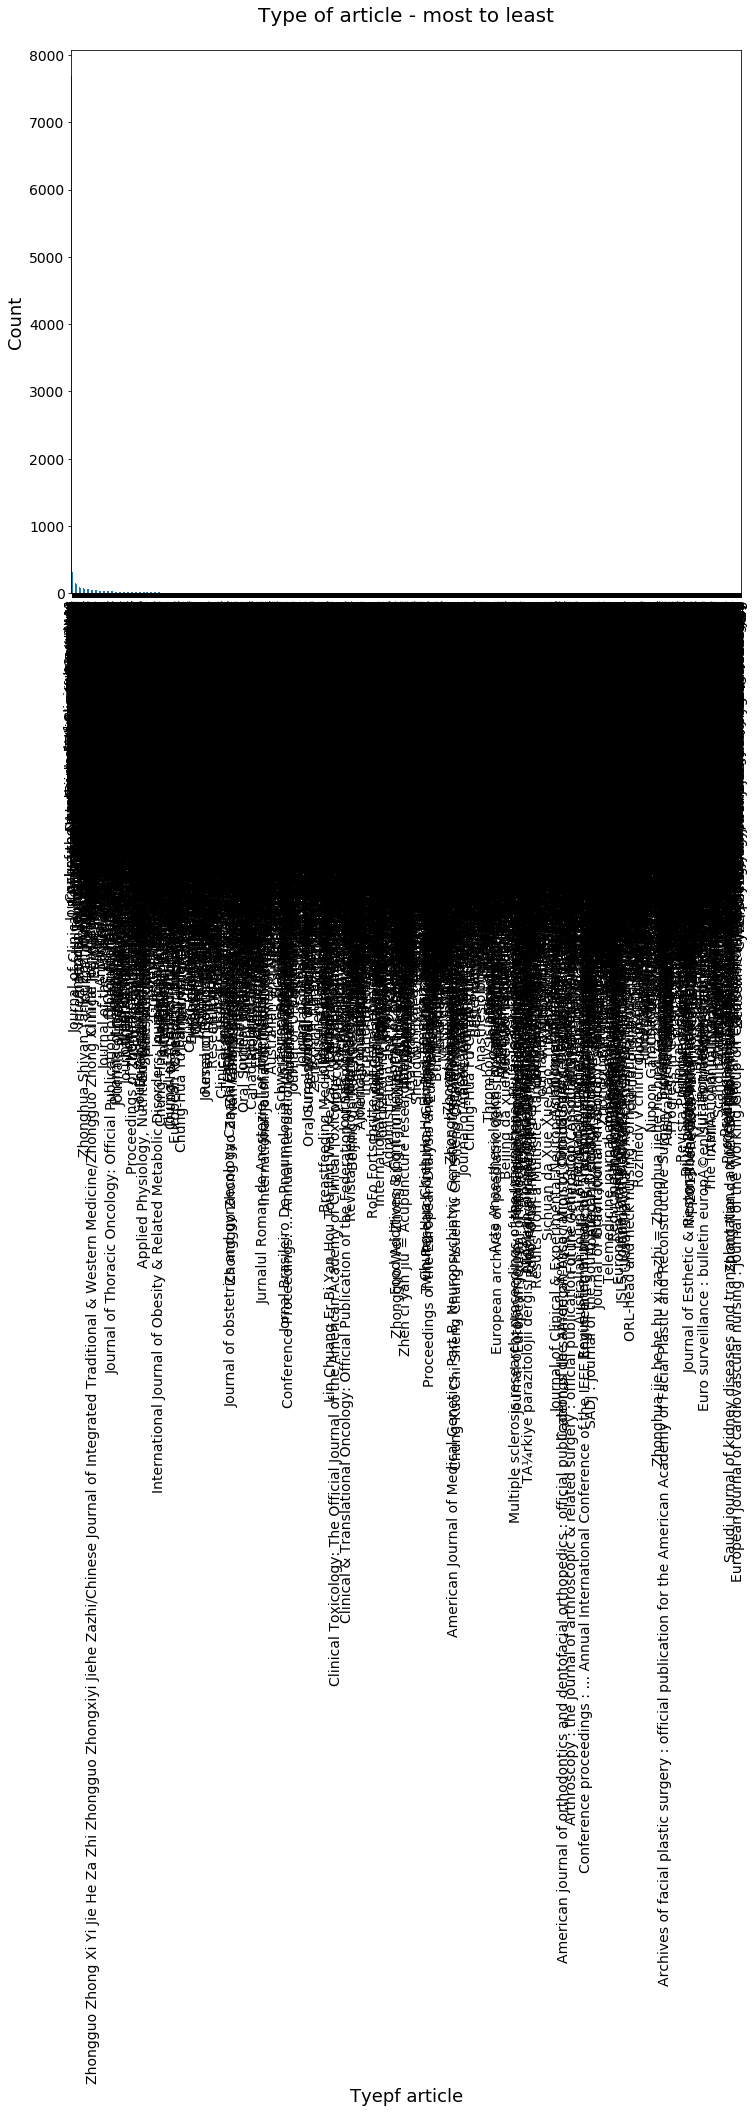

In [0]:
ax = df['Type of article'].value_counts().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Type of article - most to least\n', fontsize=20)
ax.set_xlabel('Tyepf article', fontsize=18)
ax.set_ylabel('Count', fontsize=18);

In [0]:
df['char_count'] = df['abstract'].str.len() ## this also includes spaces
df[['abstract','char_count']].head()

,abstract,char_count
0,The Beta Blocker Heart Attack Trial (BHAT) is ...,932
1,The Brain Resuscitation Clinical Trial (BRCT) ...,1654
2,The Diabetes Control and Complications Trial (...,1374
3,Within the context of the initiation of practi...,1725
4,The Ottawa Stroke Trials Registry (OSTR) colle...,971


In [0]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['abstract'].apply(lambda x: avg_word(x))
df[['abstract','avg_word']].head()

,abstract,avg_word
0,The Beta Blocker Heart Attack Trial (BHAT) is ...,5.712230
1,The Brain Resuscitation Clinical Trial (BRCT) ...,5.755102
2,The Diabetes Control and Complications Trial (...,5.806931
3,Within the context of the initiation of practi...,5.876494
4,The Ottawa Stroke Trials Registry (OSTR) colle...,6.043478


In [0]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['abstract'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['abstract','stopwords']].head()

,abstract,stopwords
0,The Beta Blocker Heart Attack Trial (BHAT) is ...,43
1,The Brain Resuscitation Clinical Trial (BRCT) ...,89
2,The Diabetes Control and Complications Trial (...,74
3,Within the context of the initiation of practi...,107
4,The Ottawa Stroke Trials Registry (OSTR) colle...,43


In [0]:
df['abstract'].count()

55633

In [0]:
import json

In [0]:
import ast

In [0]:
df2 = df.dropna()

In [0]:
df['Article name'].to_json(r'/home/iqra/BM25/new.json')